# Taher Muhammedali - 0478012

## Assignment 3 - Task 1 - Data Science ESM

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
import cartopy
import cartopy.crs as ccrs
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### (a)

In [13]:
# Importing Excel file using pd.read_excel
fn = "https://tubcloud.tu-berlin.de/s/QWXsKqHTnfWxRzj/download/GEM-GGIT-LNG-Terminals-July2022.xlsx"
df = pd.read_excel(fn, index_col=2, na_values = ["Unknown","TBD","-","--"," "])

In [14]:
df.head()

,TerminalID,ProjectID,Country,Region,Wiki,TerminalName,UnitName,OtherEnglishNames,Owner,Parent,...,State/Province,Latitude,Longitude,Accuracy,Floating,FID,FIDYear,OtherLanguageName,PowerPlantsSupplied,OtherLanguageWikiPage
ComboID,,,,,,,,,,,,,,,,,,,,,
T020501,T0205,1,United States,North America,https://www.gem.wiki/Fourchon_LNG_Terminal,Fourchon LNG Terminal,Phase 1,Gulf Coast LNG Terminal,Fourchon LNG LLC [100.00%],Energy World [100.00%],...,Louisiana,29.105833,-90.194444,approximate,NaN,Pre-FID,NaN,NaN,NaN,NaN
T020502,T0205,2,United States,North America,https://www.gem.wiki/Fourchon_LNG_Terminal,Fourchon LNG Terminal,Phase 2,Gulf Coast LNG Terminal,Fourchon LNG LLC [100.00%],Energy World [100.00%],...,Louisiana,29.105833,-90.194444,approximate,NaN,Pre-FID,NaN,NaN,NaN,NaN
T020601,T0206,1,United States,North America,https://www.gem.wiki/Alaska_South_Central_LNG_...,Alaska LNG Terminal,T1,Alaska South Central LNG Terminal,Alaska Gasline Development Corporation [100.00%],State of Alaska [100.00%],...,Alaska,60.707778,-151.262778,approximate,NaN,Pre-FID,2021,NaN,NaN,NaN
T020602,T0206,2,United States,North America,https://www.gem.wiki/Alaska_South_Central_LNG_...,Alaska LNG Terminal,T2,Alaska South Central LNG Terminal,Alaska Gasline Development Corporation [100.00%],State of Alaska [100.00%],...,Alaska,60.707778,-151.262778,approximate,NaN,Pre-FID,2021,NaN,NaN,NaN
T020603,T0206,3,United States,North America,https://www.gem.wiki/Alaska_South_Central_LNG_...,Alaska LNG Terminal,T3,Alaska South Central LNG Terminal,Alaska Gasline Development Corporation [100.00%],State of Alaska [100.00%],...,Alaska,60.707778,-151.262778,approximate,NaN,Pre-FID,2021,NaN,NaN,NaN


### (b)

In [16]:
# Converting to a Geopanda Dataframe
geometry = gpd.points_from_xy(df['Longitude'], df['Latitude'])
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs=4326)
gdf.head()

,TerminalID,ProjectID,Country,Region,Wiki,TerminalName,UnitName,OtherEnglishNames,Owner,Parent,...,Latitude,Longitude,Accuracy,Floating,FID,FIDYear,OtherLanguageName,PowerPlantsSupplied,OtherLanguageWikiPage,geometry
ComboID,,,,,,,,,,,,,,,,,,,,,
T020501,T0205,1,United States,North America,https://www.gem.wiki/Fourchon_LNG_Terminal,Fourchon LNG Terminal,Phase 1,Gulf Coast LNG Terminal,Fourchon LNG LLC [100.00%],Energy World [100.00%],...,29.105833,-90.194444,approximate,NaN,Pre-FID,NaN,NaN,NaN,NaN,POINT (-90.19444 29.10583)
T020502,T0205,2,United States,North America,https://www.gem.wiki/Fourchon_LNG_Terminal,Fourchon LNG Terminal,Phase 2,Gulf Coast LNG Terminal,Fourchon LNG LLC [100.00%],Energy World [100.00%],...,29.105833,-90.194444,approximate,NaN,Pre-FID,NaN,NaN,NaN,NaN,POINT (-90.19444 29.10583)
T020601,T0206,1,United States,North America,https://www.gem.wiki/Alaska_South_Central_LNG_...,Alaska LNG Terminal,T1,Alaska South Central LNG Terminal,Alaska Gasline Development Corporation [100.00%],State of Alaska [100.00%],...,60.707778,-151.262778,approximate,NaN,Pre-FID,2021,NaN,NaN,NaN,POINT (-151.26278 60.70778)
T020602,T0206,2,United States,North America,https://www.gem.wiki/Alaska_South_Central_LNG_...,Alaska LNG Terminal,T2,Alaska South Central LNG Terminal,Alaska Gasline Development Corporation [100.00%],State of Alaska [100.00%],...,60.707778,-151.262778,approximate,NaN,Pre-FID,2021,NaN,NaN,NaN,POINT (-151.26278 60.70778)
T020603,T0206,3,United States,North America,https://www.gem.wiki/Alaska_South_Central_LNG_...,Alaska LNG Terminal,T3,Alaska South Central LNG Terminal,Alaska Gasline Development Corporation [100.00%],State of Alaska [100.00%],...,60.707778,-151.262778,approximate,NaN,Pre-FID,2021,NaN,NaN,NaN,POINT (-151.26278 60.70778)


### (c)

Example: 1 Mt = 1 * 10e6 tonnes = 1 * 10e9 kg
LHV of LNG from Wikipedia is 45 MJ/kg
Energy = 1 Mtpa * 45 MJ/kg = 45000 * 10e12 J
Power in Wh = Energy/3600 = 12.5 * 10e12 Wh = 12.5 TWh
Therefore 1MtPa = 12.5 TWh/year

In [17]:
# Converting Mtpa to TWh/year
gdf['CapacityInTWh'] = gdf['CapacityInMtpa'] * 12.5
gdf.head()

,TerminalID,ProjectID,Country,Region,Wiki,TerminalName,UnitName,OtherEnglishNames,Owner,Parent,...,Longitude,Accuracy,Floating,FID,FIDYear,OtherLanguageName,PowerPlantsSupplied,OtherLanguageWikiPage,geometry,CapacityInTWh
ComboID,,,,,,,,,,,,,,,,,,,,,
T020501,T0205,1,United States,North America,https://www.gem.wiki/Fourchon_LNG_Terminal,Fourchon LNG Terminal,Phase 1,Gulf Coast LNG Terminal,Fourchon LNG LLC [100.00%],Energy World [100.00%],...,-90.194444,approximate,NaN,Pre-FID,NaN,NaN,NaN,NaN,POINT (-90.19444 29.10583),25.00
T020502,T0205,2,United States,North America,https://www.gem.wiki/Fourchon_LNG_Terminal,Fourchon LNG Terminal,Phase 2,Gulf Coast LNG Terminal,Fourchon LNG LLC [100.00%],Energy World [100.00%],...,-90.194444,approximate,NaN,Pre-FID,NaN,NaN,NaN,NaN,POINT (-90.19444 29.10583),37.50
T020601,T0206,1,United States,North America,https://www.gem.wiki/Alaska_South_Central_LNG_...,Alaska LNG Terminal,T1,Alaska South Central LNG Terminal,Alaska Gasline Development Corporation [100.00%],State of Alaska [100.00%],...,-151.262778,approximate,NaN,Pre-FID,2021,NaN,NaN,NaN,POINT (-151.26278 60.70778),83.75
T020602,T0206,2,United States,North America,https://www.gem.wiki/Alaska_South_Central_LNG_...,Alaska LNG Terminal,T2,Alaska South Central LNG Terminal,Alaska Gasline Development Corporation [100.00%],State of Alaska [100.00%],...,-151.262778,approximate,NaN,Pre-FID,2021,NaN,NaN,NaN,POINT (-151.26278 60.70778),83.75
T020603,T0206,3,United States,North America,https://www.gem.wiki/Alaska_South_Central_LNG_...,Alaska LNG Terminal,T3,Alaska South Central LNG Terminal,Alaska Gasline Development Corporation [100.00%],State of Alaska [100.00%],...,-151.262778,approximate,NaN,Pre-FID,2021,NaN,NaN,NaN,POINT (-151.26278 60.70778),83.75


### (d)

In [18]:
# Finding the number of LNG Terminals and their Median (assuming no duplicates) # Need to check again
lnggdf = gdf.copy()
print('%.0f LNG Terminals are included in the dataset' % len(lnggdf))
print('Median capacity of LNG Terminals is %.2f TWh/year' % lnggdf["CapacityInTWh"].median())

1173 LNG Terminals are included in the dataset
Median capacity of LNG Terminals is 43.75 TWh/year


### (e)

In [19]:
# Finding share of Import terminals that are floating (all Terminals, including non-LNG)
abc1 = gdf[gdf["Import/Export"] == 'Import']
abc2 = abc1[abc1["Floating"] == 'yes']
print('Out of %.0f Import Terminals, %.0f are Floating. This is %.2f percent.' % (len(abc1),len(abc2),(len(abc2)/len(abc1)*100)))

Out of 606 Import Terminals, 176 are Floating. This is 29.04 percent.


### (f)

In [20]:
# Finding the Oldest Start Year of LNG Terminal whose status is still Operating
abc3 = lnggdf[lnggdf["Status"] == 'Operating']
abc3[abc3.StartYear1 == abc3.StartYear1.min()]

,TerminalID,ProjectID,Country,Region,Wiki,TerminalName,UnitName,OtherEnglishNames,Owner,Parent,...,Longitude,Accuracy,Floating,FID,FIDYear,OtherLanguageName,PowerPlantsSupplied,OtherLanguageWikiPage,geometry,CapacityInTWh
ComboID,,,,,,,,,,,,,,,,,,,,,
T050300,T0503,0,Japan,East Asia,https://www.gem.wiki/Negishi_LNG_Terminal,Negishi LNG Terminal,NaN,NaN,JERA [unknown %]; Tokyo Gas [unknown %],Chubu Electric Power [unknown %]; Tokyo Electr...,...,139.6285,exact,NaN,NaN,NaN,NaN,NaN,NaN,POINT (139.62850 35.40423),150.0
T052200,T0522,0,Spain,Europe,https://www.gem.wiki/Barcelona_LNG_Terminal,Barcelona LNG Terminal,NaN,NaN,Enagás [100.00%],Enagás [100.00%],...,2.1583,exact,NaN,NaN,NaN,NaN,NaN,NaN,POINT (2.15830 41.33940),157.5


In [21]:
# Finding the Countries where the oldest operating LNG Terminal is located
abc3.loc[abc3['StartYear1'] == abc3.StartYear1.min(), 'Country']

ComboID
T050300    Japan
T052200    Spain
Name: Country, dtype: object

### (g)

Text(0.5, 1.0, 'Top 10 countries with Largest LNG Terminal Capacities')

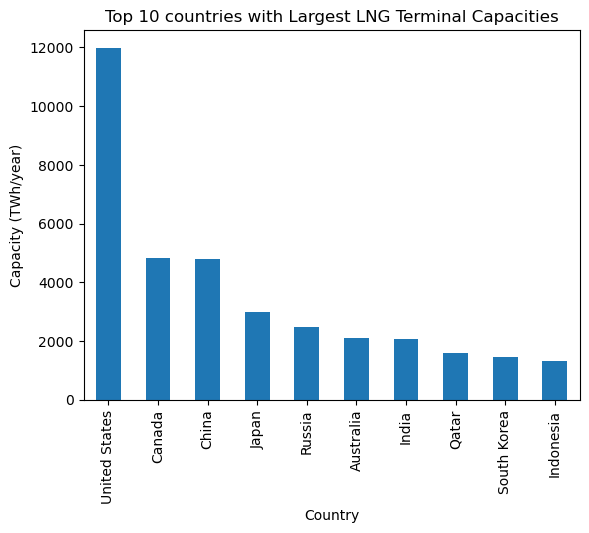

In [22]:
# Finding the 10 countries with largest LNG Terminal capacities using Groupby and plotting as a bar chart
toptenlng = lnggdf.groupby("Country").CapacityInTWh.sum().nlargest(10)
toptenlng.plot.bar()
plt.ylabel('Capacity (TWh/year)')
plt.title('Top 10 countries with Largest LNG Terminal Capacities')

### (h)

Text(0.5, 1.0, 'Terminal Capacities as per their current Status')

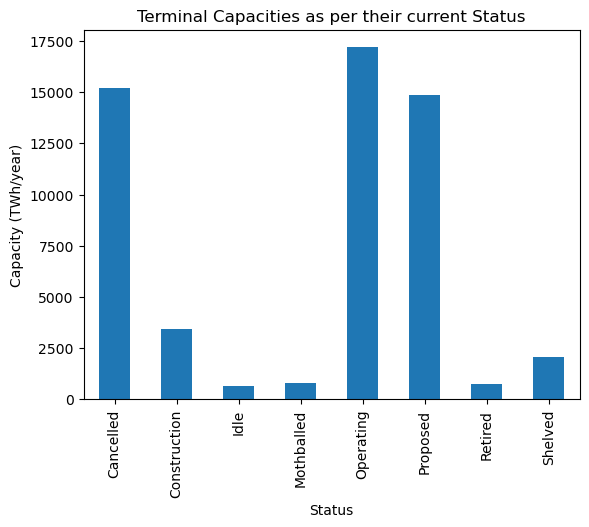

In [23]:
# Finding LNG Terminal capacities as per their current status using Groupby and plotting as a bar chart
statuslng = lnggdf.groupby("Status").CapacityInTWh.sum()
statuslng.plot.bar()
plt.ylabel('Capacity (TWh/year)')
plt.title('Terminal Capacities as per their current Status')

### (i)

In [24]:
# Creating a table for Germany LNG Terminals and only showing specific columns
germanlng = lnggdf[lnggdf["Country"] == 'Germany']
germanlng = germanlng[['TerminalName','Owner','Country','Status','StartYear1','CapacityInMtpa','CapacityInTWh','Floating']]
# germanlng['Floating'] = germanlng['Floating'].replace(np.nan, 'no')
germanlng = germanlng.sort_values('StartYear1')
germanlng

,TerminalName,Owner,Country,Status,StartYear1,CapacityInMtpa,CapacityInTWh,Floating
ComboID,,,,,,,,
T107700,Lubmin FSRU,Deutsche Regas [unknown %],Germany,Proposed,2021.0,3.31,41.375,yes
T045800,Wilhelmshaven FSRU,Uniper [100.00%],Germany,Construction,2022.0,5.51,68.875,yes
T072200,Rostock LNG Terminal,Fluxys [unknown %]; Novatek [unknown %],Germany,Cancelled,2023.0,0.30,3.750,NaN
T100000,Wilhelmshaven NWO FSRU Terminal,Nord West Ölleitung [400.00%],Germany,Proposed,2023.0,6.62,82.750,NaN
T108600,Stade FSRU,Unknown [unknown %],Germany,Proposed,2023.0,NaN,NaN,yes
T046000,Brunsbüttel FSRU,German LNG Terminal [300.00%],Germany,Proposed,2024.0,5.88,73.500,NaN
T100100,TES Wilhelmshaven LNG Terminal,Tree Energy Solutions [100.00%],Germany,Proposed,2025.0,11.76,147.000,NaN
T072100,Stade LNG Terminal,Buss Group [unknown %]; Dow Chemical [unknown ...,Germany,Proposed,2026.0,9.78,122.250,NaN
T108400,Brunsbüttel LNG Terminal,Gasunie [unknown %]; Oiltanking [unknown %]; V...,Germany,Proposed,2026.0,5.88,73.500,NaN


### (j)

Text(0.5, 1.0, 'LNG Terminals starting per year')

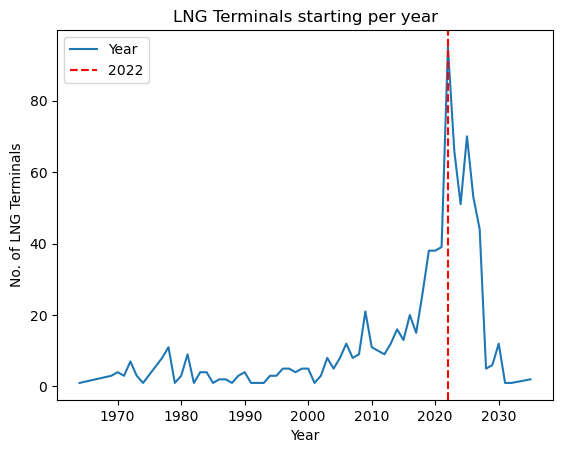

In [28]:
# Creating a Line Chart showing number of terminals according to their Starting Year, with a reference line for 2022
termyear = lnggdf.groupby("StartYear1").StartYear1.count()
termyear.plot.line(label = 'Year')
plt.ylabel('No. of LNG Terminals')
plt.xlabel('Year')
plt.axvline(x = 2022, color = 'r', label = '2022', linestyle = 'dashed')
plt.legend(loc='upper left')
plt.title('LNG Terminals starting per year')

### (k)

In [60]:
# Creating a function that takes a geodataframe and a title for the chart
def makeaplot(newgdf, plottitle):

    fig = plt.figure(figsize=(15,10))

    crs = ccrs.Mercator() # Mercator projection

    ax = plt.axes(projection=crs)
    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS, color='grey', linewidth=0.5)

    newgdf.to_crs(crs.proj4_init).plot(
        ax=ax,
        column='Status',
        markersize=gdf.CapacityInTWh * 3, # Markersize multiplied to increase visibility
        legend=True, alpha=0.6)
    plt.title(plottitle)

### (l)

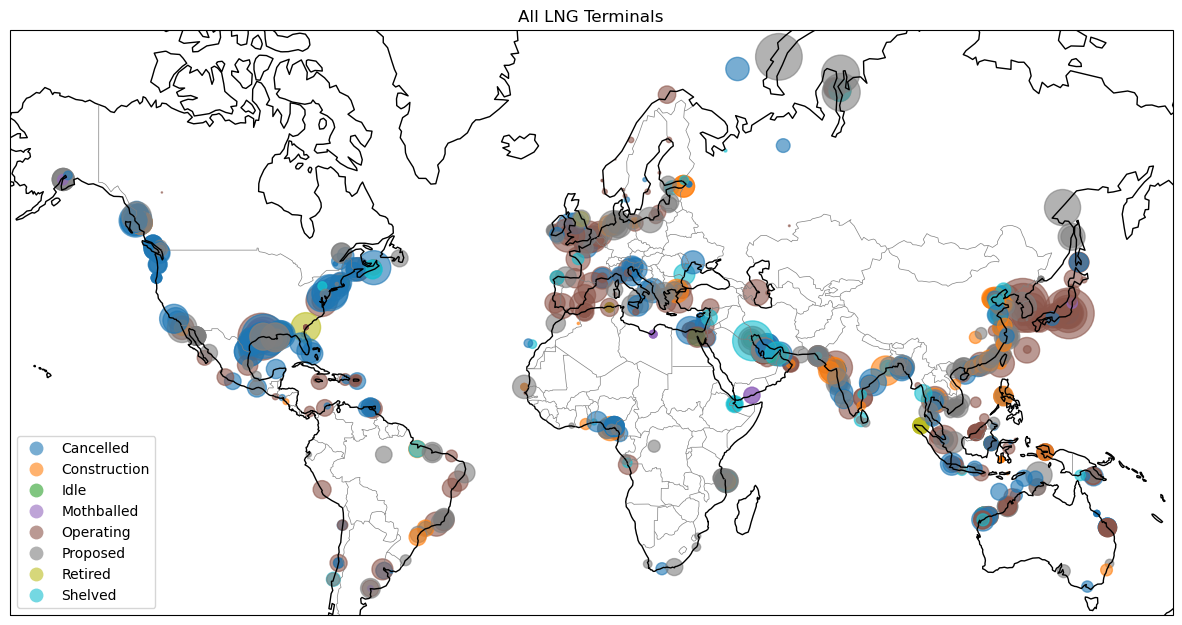

In [55]:
# All LNG terminals
makeaplot(lnggdf, 'All LNG Terminals')

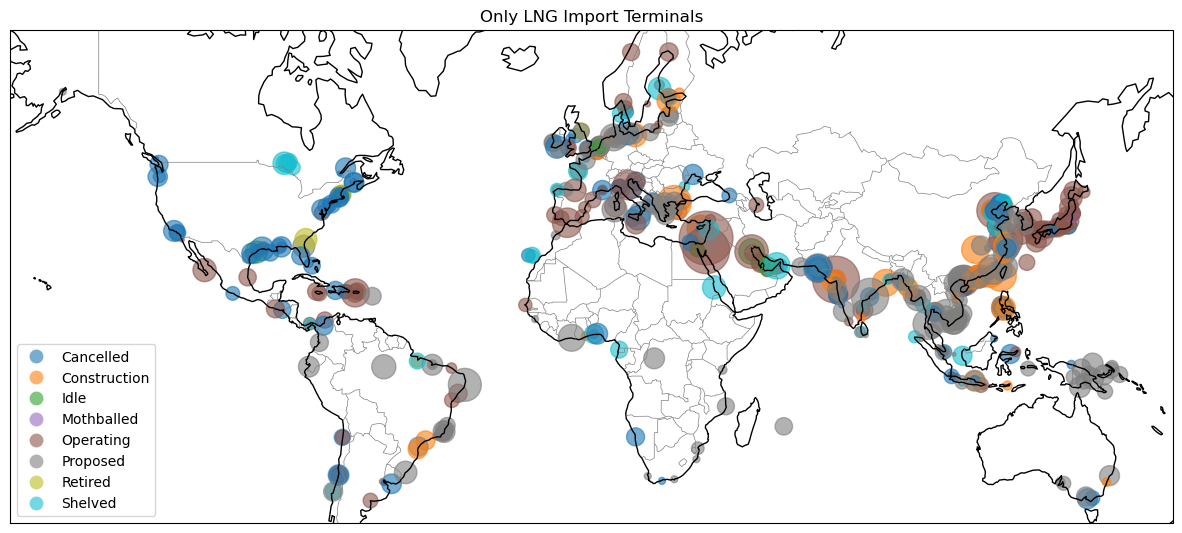

In [56]:
# Only LNG import terminals
importlng = lnggdf[lnggdf["Import/Export"] == 'Import']
makeaplot(importlng, 'Only LNG Import Terminals')

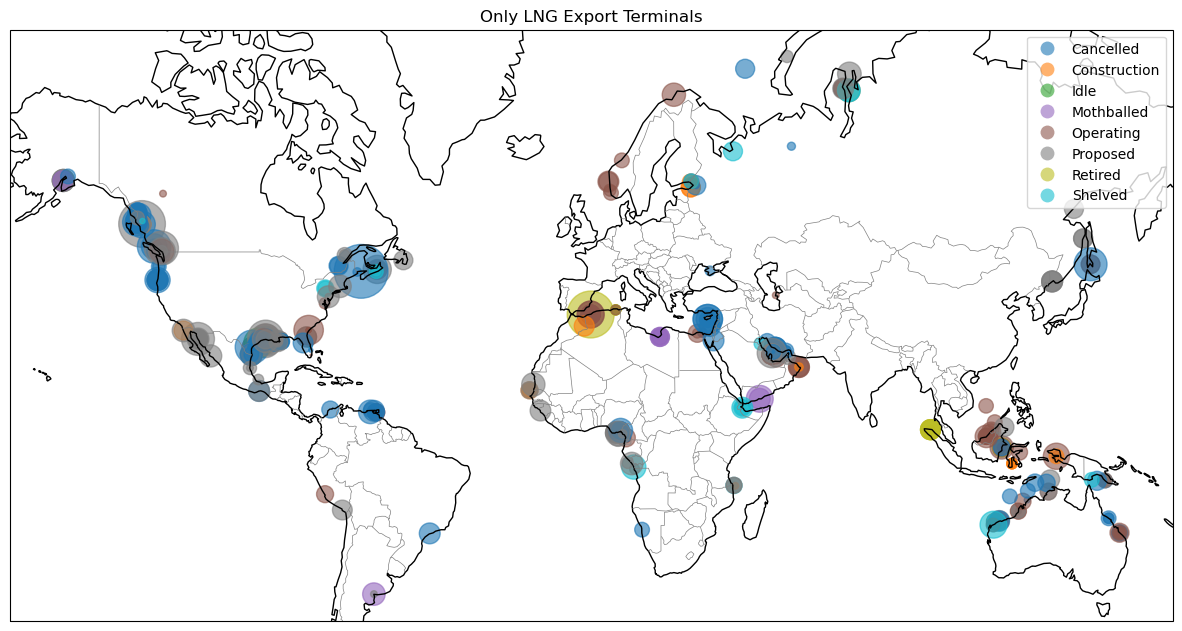

In [57]:
# Only LNG export terminals
exportlng = lnggdf[lnggdf["Import/Export"] == 'Export']
makeaplot(exportlng,'Only LNG Export Terminals')

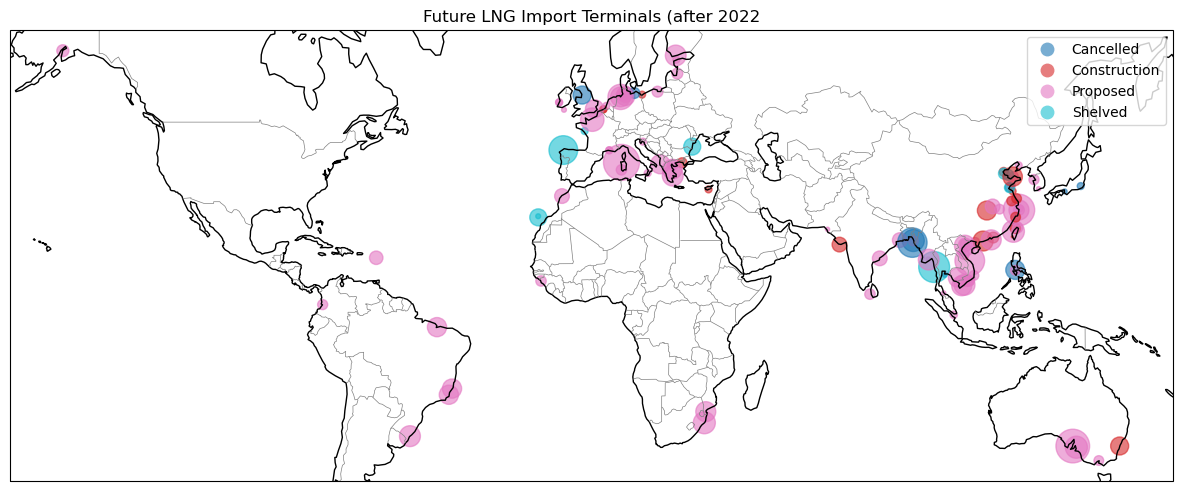

In [58]:
# Only future LNG import terminals
importlng['StartYear1'] = importlng['StartYear1'].replace(np.nan, 0)
importlng['StartYear1'] = importlng['StartYear1'].replace(" ", 0)
importlng['StartYear1'] = pd.to_numeric(importlng['StartYear1'])
futurelng = importlng[importlng['StartYear1'] > 2022]

makeaplot(futurelng, 'Future LNG Import Terminals (after 2022')

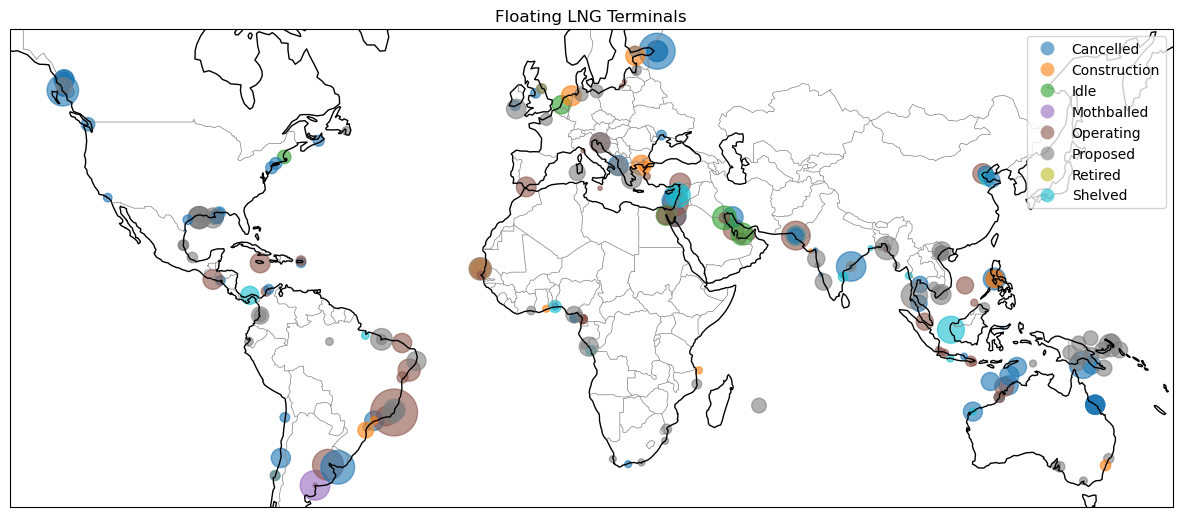

In [59]:
# Only floating LNG terminals
floatinglng = lnggdf[lnggdf["Floating"] == 'yes']
makeaplot(floatinglng,'Floating LNG Terminals')